Práctica Luis Bastos

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [5]:
train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
2472,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
12299,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
4024,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
12692,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
11228,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [6]:
train.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [7]:
train.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
                                  ...  
Cancellation Policy               False
Calculated host listings count     True
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

Como se puede comprobar en la siguiente inea, el dataset contiene numerosas ciudades. Aunque se deberia realizar un análisis para determinar que ciudad escogeriamos, nosotros de antemano sabemos que nuestro análisis se centrara en Madrid.

In [9]:
train['City'].unique()

array(['Madrid', 'Illetes', 'Etterbeek', 'Palma', 'Betlem', 'Paris',
       '马德里', 'Rome', 'Bondi', 'Seattle', 'Los Angeles', 'Sutton',
       'Barcelona', 'Amsterdam', 'Dublin', 'Berlin', 'Santa Margalida',
       'Petra', 'Pasadena', 'London', 'Can Picafort',
       'Santa Maria del Camí', 'Llucmajor', 'København', 'Brooklyn',
       'Darlinghurst', 'Sant Llorenç des Cardassar', 'Washington',
       'Edinburgh', 'Chicago', 'Chelsea, London', 'Sencelles',
       'Valldemossa', 'New York', 'Manacor', 'Roma', 'Vancouver',
       'Son Servera', 'Madrid, Comunidad de Madrid, ES', 'Antwerpen',
       'Palma de Mallorca', 'Sóller', 'Wien', 'Campanet', 'Denver',
       'Venice', 'Enmore', 'Frederiksberg', 'las matas  madrid', 'Vienna',
       'Can Pastilla', 'Selva', 'Illes Balears', 'Potts Point',
       'Melbourne', 'Pollensa', 'Toronto', 'Delicias-Madrid', 'Llubí',
       'Santanyí', 'Binissalem', 'Algaida', 'Pozuelo de Alarcón',
       'Alcúdia', 'San Francisco', 'Cala Ratjada', 'Deià',


Como hay datos de Madrid con distintos nobres, realizamos una busqueda con contains y obtenemos el total de datos.

In [11]:
train = train[train['City'].str.contains('drid', na=False)]

In [12]:
train['City'].unique()
train.shape

(10592, 89)

In [13]:
train['City']=='Madrid'

2472     True
12299    True
4024     True
12692    True
11228    True
         ... 
13123    True
3264     True
9845     True
10799    True
2732     True
Name: City, Length: 10592, dtype: bool

In [14]:
train['City'] = train['City'].apply(lambda x: 'Madrid')
train['City'].unique()

array(['Madrid'], dtype=object)

In [15]:
train.shape

(10592, 89)

Cambiamos la variable objetivo al primero lugar

In [17]:
from pandas import DataFrame
def move_columns(df: pd.DataFrame, cols_to_move: list, new_index: int) -> DataFrame:
    other = [c for c in df if c not in cols_to_move]
    start = other[0:new_index]
    end = other[new_index:]
    return df[start + cols_to_move + end]
train = move_columns(train, ['Price'],0)

In [18]:
train.columns

Index(['Price', 'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name',
       'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url',
       'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since',
       'Host Location', 'Host About', 'Host Response Time',
       'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
       'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Weekly Price',
       'Month

En primero lugar eliminamos las variables que correspondan a IDs y URLs.

In [20]:
train = train.drop(['ID','Listing Url','Scrape ID','Thumbnail Url','Medium Url','Picture Url','XL Picture Url', 'Host ID', 'Host URL', 'Host Name','Host About', 'Host Thumbnail Url', 'Host Picture Url', 'License', 'Jurisdiction Names','Features' ],axis=1)


In [21]:
#Vemos que hemos eliminado de las columnas
train.shape

(10592, 73)

Ahora, calculamos el número de missing que hay en cada variable y eliminamos aquellas que tienen más de un 30% de valores missing.

In [23]:
train_missing = train.isna()
train_num_missing = train_missing.sum()
total_per = train_num_missing / len(train)

In [24]:
for items in total_per.iteritems():
    print(items)

('Price', 0.0007552870090634441)
('Last Scraped', 0.0)
('Name', 0.0)
('Summary', 0.03672583081570997)
('Space', 0.2685045317220544)
('Description', 0.0005664652567975831)
('Experiences Offered', 0.0)
('Neighborhood Overview', 0.373678247734139)
('Notes', 0.6178247734138973)
('Transit', 0.3781155589123867)
('Access', 0.43089123867069484)
('Interaction', 0.4313632930513595)
('House Rules', 0.3523413897280967)
('Host Since', 0.00028323262839879157)
('Host Location', 0.003115558912386707)
('Host Response Time', 0.12415030211480363)
('Host Response Rate', 0.12415030211480363)
('Host Acceptance Rate', 1.0)
('Host Neighbourhood', 0.24424093655589124)
('Host Listings Count', 0.00028323262839879157)
('Host Total Listings Count', 0.00028323262839879157)
('Host Verifications', 0.00037764350453172205)
('Street', 0.0)
('Neighbourhood', 0.33487537764350456)
('Neighbourhood Cleansed', 0.0)
('Neighbourhood Group Cleansed', 0.0)
('City', 0.0)
('State', 0.003493202416918429)
('Zipcode', 0.03285498489425

In [25]:
listado = []
for index, value in total_per.items():
    if value > 0.3:
        listado += [index]
        print(f"Index : {index}, Value : {value}")



Index : Neighborhood Overview, Value : 0.373678247734139
Index : Notes, Value : 0.6178247734138973
Index : Transit, Value : 0.3781155589123867
Index : Access, Value : 0.43089123867069484
Index : Interaction, Value : 0.4313632930513595
Index : House Rules, Value : 0.3523413897280967
Index : Host Acceptance Rate, Value : 1.0
Index : Neighbourhood, Value : 0.33487537764350456
Index : Square Feet, Value : 0.9610083081570997
Index : Weekly Price, Value : 0.7448074018126888
Index : Monthly Price, Value : 0.747262084592145
Index : Security Deposit, Value : 0.5699584592145015
Index : Cleaning Fee, Value : 0.4059667673716012
Index : Has Availability, Value : 1.0


De el listado anterior no vamos a eliminar por razones obvias el BArrio, y tampoco el deposito y la limpieza, pues entendemos que auqellos pisos con estos campos vacios no cobran este servicio.

In [27]:
train = train.drop(['Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host Acceptance Rate',
  'Square Feet',
 'Weekly Price',
 'Monthly Price','Has Availability'
],axis=1)

A continuación, eliminamos aquellas variables categoricas que no puedan ser transformadas y tambien aquellas que no nos aporten información.

In [ ]:
train.columns

In [30]:
train = train.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
                 'Host Location', 'Host Neighbourhood', 'Street', 'City',
       'State', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Calendar last Scraped', 'First Review', 'Last Review','Geolocation'
],axis=1)

In [31]:
train.shape

(10592, 43)

Como la variable de Barrio tienen muchos valores nulos, vamos a rellenarlos con los valores de la variable "limpia". Hay que saber de antemano, que hay muchos valores (quitando los missing) que no coinciden entre estas dos columnas, probablemente habría que hacer un análisis mas exhaustivo para comprobar de cual podemos fiarnos mas.

In [33]:
#Primero hacemos un analisis

In [34]:
limpio = train['Neighbourhood Cleansed']
no_limpio = train['Neighbourhood']

In [35]:
df = pd.DataFrame(train, columns=['Neighbourhood', 'Neighbourhood Cleansed'])

In [36]:
df['comparativa'] = np.where((df['Neighbourhood'] != df['Neighbourhood Cleansed']), df['Neighbourhood Cleansed'], np.nan)

In [37]:
def f(x):    
   return 'yes' if x['Neighbourhood'] == x['Neighbourhood Cleansed'] else 'no'

df['comparativa'] = df.apply(f, axis=1)

In [38]:
df['comparativa'].value_counts()

no     6423
yes    4169
Name: comparativa, dtype: int64

In [39]:
#Hay más de 6000 valores distintos, contando con los nulos.

In [40]:
dfnona = df[df.Neighbourhood.notnull()]
dfnot = dfnona[dfnona.comparativa != 'yes']

In [41]:
dfnot.shape

(2876, 3)

In [42]:
#HAy 2876 valores que son distintos entre ambas columnas, simplemente para dejar claro que nos fiamos del cleaned

In [43]:
#Quitamos los Na de barrio con los valores del dataset limpio

In [44]:
train['Neighbourhood'] = np.where(train['Neighbourhood'].isnull(),train['Neighbourhood Cleansed'] , train['Neighbourhood'])

In [45]:
train['Neighbourhood'].isnull().any()

False

In [46]:
train = train.drop(['Neighbourhood Cleansed'
],axis=1)

Seguimos con el análisis exploratorio anañizando la correlación entre variables, como todavia tenemos muchas, utilizamos una función para darnos las top 10. Una vez obtenidas eliminamos aquellas mas correladas.

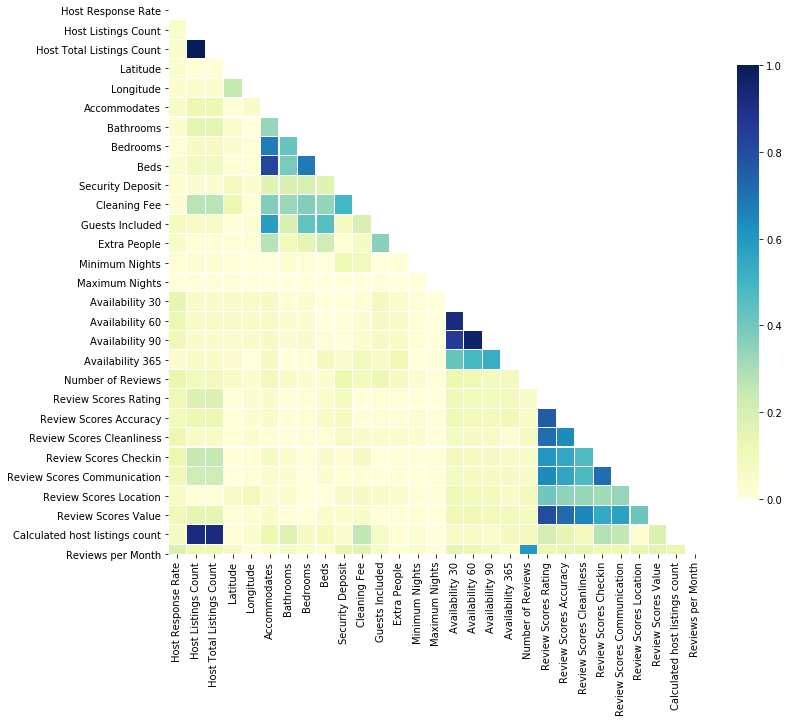

In [48]:
import seaborn as sns

#Pintamos la matriz de correlacion para verlo mas claro
# Compute the correlation matrix
corr = np.abs(train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [49]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlacion"]
    correlation = correlation.reindex(correlation.Correlacion.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)

top_correlation(train,10)

,Variable_1,Variable_2,Correlacion
0,Host Listings Count,Host Total Listings Count,1.000000
1,Availability 60,Availability 90,0.963803
2,Availability 30,Availability 60,0.922020
3,Host Listings Count,Calculated host listings count,0.919963
4,Host Total Listings Count,Calculated host listings count,0.919963
5,Availability 30,Availability 90,0.851990
6,Accommodates,Beds,0.823347
7,Review Scores Rating,Review Scores Value,0.803419
8,Review Scores Rating,Review Scores Accuracy,0.755269
9,Review Scores Accuracy,Review Scores Value,0.721092


In [50]:
train = train.drop(['Host Total Listings Count', 'Zipcode'
],axis=1)

In [51]:
train.head().T

,2472,12299,4024,12692,11228
Price,60,50,10,30,32
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Listings Count,2,1,16,114,2
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood,Jerónimos,Sol,Carabanchel,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372


Comenzamos a rellenar valores Nan en este caso y como comentamos anteriormente, las variables de limpieza y deposito las rellenamos con 0, puesto que entendemos que si estan vacias es porque no cobran dicho servicio.
Sin embargo, la variable objetivo la rellenamos con la media.

In [53]:
#Rellenamos con ceros
train["Cleaning Fee"].fillna(0 , inplace=True)
train["Security Deposit"].fillna(0 , inplace=True)

In [54]:
train["Price"].fillna(train["Price"].mean(), inplace=True)

Filtrado de la varia objetivo, utilizando describe y un boxplot, podemos ver que hay muchos outlayers. Eliminamos aquellos precios superiores a 200 (podemos aun eliminar más)

In [55]:
train['Price'].describe()

count    10592.000000
mean        66.137188
std         56.098278
min          9.000000
25%         31.000000
50%         53.000000
75%         80.000000
max        875.000000
Name: Price, dtype: float64

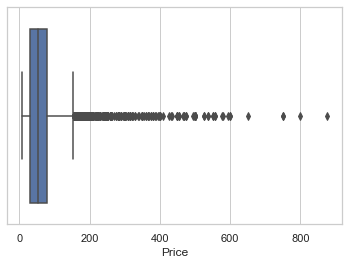

In [56]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=train["Price"])

In [57]:
prueba55 = train
train.shape

(10592, 40)

In [58]:
my_filter2 = prueba55['Price'] < 200
house_data_filtered = prueba55[my_filter2]

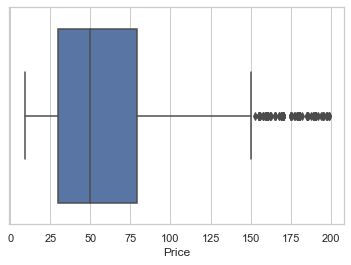

In [59]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=house_data_filtered["Price"])

In [60]:
house_data_filtered.head().T

,2472,12299,4024,12692,11228
Price,60,50,10,30,32
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Listings Count,2,1,16,114,2
Host Verifications,"email,phone,reviews,work_email","email,phone,reviews,jumio,offline_government_i...","email,phone,facebook,google,reviews,jumio,gove...","email,phone,reviews,work_email","email,phone,reviews,jumio"
Neighbourhood,Jerónimos,Sol,Carabanchel,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372


Transformación de la variable Host Verifications, en este caso realizamos un count para ver por cuantas vias puede contactar el cliente con el host, de esta manera comproamos si este trabajo extra del host tiene efectos sobre el precio:

In [61]:
house_data_filtered['Host Verifications'] = house_data_filtered['Host Verifications'].str.count(',')

Transformación de la variable Host Since, calculando la antiguedad en años del host.

In [62]:
from datetime import datetime

house_data_filtered['Host Since'] = pd.to_datetime(house_data_filtered['Host Since'], format="%Y-%m-%d")
house_data_filtered['Host Since'] = house_data_filtered['Host Since'].apply(lambda x: 2017 - x.year)
house_data_filtered.head()

,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Verifications,Neighbourhood,Neighbourhood Group Cleansed,Latitude,Longitude,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
2472,60.0,2.0,within a few hours,100.0,2.0,3.0,Jerónimos,Retiro,40.407732,-3.684819,...,95.0,9.0,10.0,10.0,10.0,10.0,9.0,moderate,2.0,0.50
12299,50.0,1.0,within an hour,100.0,1.0,5.0,Sol,Centro,40.415802,-3.705340,...,91.0,9.0,9.0,10.0,10.0,10.0,10.0,flexible,1.0,2.43
4024,10.0,1.0,within an hour,100.0,16.0,6.0,Carabanchel,Carabanchel,40.389048,-3.740374,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN
12692,30.0,3.0,within a few hours,100.0,114.0,3.0,Embajadores,Centro,40.412814,-3.703052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN
11228,32.0,5.0,within an hour,100.0,2.0,3.0,Gaztambide,Chamberí,40.438631,-3.713716,...,92.0,9.0,9.0,9.0,10.0,9.0,9.0,strict,2.0,2.08


Transformación de la variable tiempo de respuesta, consideramos que si el campo esta vacio es porque el host tarda mas de unos cuantos días.

In [63]:
house_data_filtered['Host Response Time'].value_counts()

within an hour        5560
within a few hours    2042
within a day          1213
a few days or more     204
Name: Host Response Time, dtype: int64

In [64]:
house_data_filtered[house_data_filtered['Host Response Time'].isnull()]

,Price,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Verifications,Neighbourhood,Neighbourhood Group Cleansed,Latitude,Longitude,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
11440,50.0,1.0,NaN,NaN,2.0,1.0,Ibiza,Retiro,40.420055,-3.676365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,2.0,NaN
5693,25.0,2.0,NaN,NaN,1.0,2.0,Prosperidad,Chamartín,40.447217,-3.664344,...,80.0,10.0,7.0,9.0,10.0,9.0,9.0,flexible,1.0,0.22
7809,25.0,1.0,NaN,NaN,1.0,1.0,Goya,Salamanca,40.427704,-3.673472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN
6248,40.0,2.0,NaN,NaN,1.0,4.0,Almagro,Chamberí,40.429790,-3.695666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN
13360,20.0,2.0,NaN,NaN,2.0,2.0,Guindalera,Salamanca,40.434892,-3.669846,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2599,14.0,2.0,NaN,NaN,1.0,2.0,Berruguete,Tetuán,40.463487,-3.705588,...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,strict,1.0,0.05
3468,29.0,4.0,NaN,NaN,1.0,6.0,Palacio,Centro,40.422246,-3.711413,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.0,0.15
6744,15.0,0.0,NaN,NaN,1.0,1.0,Peñagrande,Fuencarral - El Pardo,40.482411,-3.722276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN
5874,40.0,1.0,NaN,NaN,1.0,2.0,Palacio,Centro,40.413321,-3.713624,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.0,1.07


In [65]:
house_data_filtered['Host Response Time'].fillna('a few days or more', inplace=True)

In [66]:
house_data_filtered['Host Response Time'].value_counts()

within an hour        5560
within a few hours    2042
a few days or more    1476
within a day          1213
Name: Host Response Time, dtype: int64

Transformación de la variable amenities, en este caso tenemos diferentes servicios o cosas que ofrecen los pisos, consideramos que hay variables que son clave para establecer el precio final. Por ello, realizamos una especie de dummie, y creamos dos nuevas columnas para aquellos pisos que si tienen aire acondicionado y wifi.

In [67]:
house_data_filtered['Air conditioning'] = np.where(house_data_filtered['Amenities'].str.contains('Air cond', regex=False),1,0)
house_data_filtered['Wireless Internet'] = np.where(house_data_filtered['Amenities'].str.contains('Wireless', regex=False),1,0)
#df4['Air conditioning'] = np.where(df4['Amenities'].str.contains('Air cond', regex=False),1,0)


In [68]:
house_data_filtered = house_data_filtered.drop(['Amenities'
],axis=1)

Creación de variable distancia_metro:
Descargamos un df con la localizacion de cada parada de metro de madrid y creamos una funcion que compare la distancia de cada piso con todas esas paradas de metro y se quede con a mas cercana. De esta manera tendremos en esa columna la distancia del piso a la parada demetro mas cercana en kms.

In [70]:
metro_df = pd.read_excel('./Metro_2019_12.xlsx',  index_col=2)

In [71]:
metro_df.head()

,Longitude,Latitude,Name,description
gid,,,,
1,-3.645225,40.389769,1 ALTO DEL ARENAL,NaN
2,-3.703318,40.450331,1 ALVARADO,NaN
3,-3.699376,40.412463,1 ANTON MARTIN,NaN
4,-3.692491,40.408847,1 ATOCHA,NaN
5,-3.689380,40.406586,1 ATOCHA RENFE,NaN


In [72]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def distance_metro(long1,lat1,long2,lat2):    
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(long1)
    lat2 = radians(lat2)
    lon2 = radians(long2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [73]:
def comparador(row):
    lat = row['Latitude']
    long = row['Longitude']
    v = list()
    for i in range(len(metro_df)):
        c = distance_metro(metro_df['Longitude'][i+1],metro_df['Latitude'][i+1], long, lat )
        v.append(c)
    return min(v)

In [74]:
house_data_filtered['distancia_metro'] = house_data_filtered[['Latitude','Longitude']].apply(lambda row: comparador(row), axis=1)

In [75]:
house_data_filtered.head().T

,2472,12299,4024,12692,11228
Price,60,50,10,30,32
Host Since,2,1,1,3,5
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Listings Count,2,1,16,114,2
Host Verifications,3,5,6,3,3
Neighbourhood,Jerónimos,Sol,Carabanchel,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372


Tranformacion de variable politica de cancelacion, consideramos que solo hay una estricta, por eso las que sean strict_30 y strict_60 las metemos en el mismo pauqete.

In [76]:
house_data_filtered['Cancellation Policy'].value_counts()

strict             3810
flexible           3350
moderate           3124
super_strict_60       5
super_strict_30       2
Name: Cancellation Policy, dtype: int64

In [77]:
#house_data_filtered['Cancellation Policy'].apply(lambda x: 'strict' if x.str.contains('strict'))

house_data_filtered['Cancellation Policy'] = house_data_filtered['Cancellation Policy'].apply(lambda x: 'strict' if 'strict' in x else x)

In [78]:
house_data_filtered.head().T

,2472,12299,4024,12692,11228
Price,60,50,10,30,32
Host Since,2,1,1,3,5
Host Response Time,within a few hours,within an hour,within an hour,within a few hours,within an hour
Host Response Rate,100,100,100,100,100
Host Listings Count,2,1,16,114,2
Host Verifications,3,5,6,3,3
Neighbourhood,Jerónimos,Sol,Carabanchel,Embajadores,Gaztambide
Neighbourhood Group Cleansed,Retiro,Centro,Carabanchel,Centro,Chamberí
Latitude,40.4077,40.4158,40.389,40.4128,40.4386
Longitude,-3.68482,-3.70534,-3.74037,-3.70305,-3.71372


In [79]:
house_data_filtered.dtypes

Price                             float64
Host Since                        float64
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Verifications                float64
Neighbourhood                      object
Neighbourhood Group Cleansed       object
Latitude                          float64
Longitude                         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Calendar Updated                  

In [80]:
house_data_filtered.isnull().any()

Price                             False
Host Since                         True
Host Response Time                False
Host Response Rate                 True
Host Listings Count                True
Host Verifications                 True
Neighbourhood                     False
Neighbourhood Group Cleansed      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False


Rellenamos con la moda las na de las variables categóricas

In [81]:
house_data_filtered["Host Response Time"].fillna(house_data_filtered["Host Response Time"].mode()[0], inplace=True)
house_data_filtered["Reviews per Month"].fillna(house_data_filtered["Reviews per Month"].mode()[0], inplace=True)



In [ ]:
Rellenamos con la media las variables continuas

In [82]:
house_data_filtered["Host Since"].fillna(house_data_filtered["Host Since"].mean(), inplace=True)
house_data_filtered["Host Response Rate"].fillna(house_data_filtered["Host Response Rate"].mean(), inplace=True)
house_data_filtered["Host Listings Count"].fillna(house_data_filtered["Host Listings Count"].mean(), inplace=True)
house_data_filtered["Host Verifications"].fillna(house_data_filtered["Host Verifications"].mean(), inplace=True)
house_data_filtered["Bathrooms"].fillna(house_data_filtered["Bathrooms"].mean(), inplace=True)
house_data_filtered["Bedrooms"].fillna(house_data_filtered["Bedrooms"].mean(), inplace=True)
house_data_filtered["Beds"].fillna(house_data_filtered["Beds"].mean(), inplace=True)
house_data_filtered["Review Scores Rating"].fillna(house_data_filtered["Review Scores Rating"].mean(), inplace=True)
house_data_filtered["Review Scores Accuracy"].fillna(house_data_filtered["Review Scores Accuracy"].mean(), inplace=True)
house_data_filtered["Review Scores Cleanliness"].fillna(house_data_filtered["Review Scores Cleanliness"].mean(), inplace=True)
house_data_filtered["Review Scores Checkin"].fillna(house_data_filtered["Review Scores Checkin"].mean(), inplace=True)
house_data_filtered["Review Scores Communication"].fillna(house_data_filtered["Review Scores Communication"].mean(), inplace=True)
house_data_filtered["Review Scores Location"].fillna(house_data_filtered["Review Scores Location"].mean(), inplace=True)
house_data_filtered["Review Scores Value"].fillna(house_data_filtered["Review Scores Value"].mean(), inplace=True)


Añadimos una variable que creo puede ser interesante, numero de camas por habitacion. Si es menor de 1, sabemos que se duereme en sofa.

In [83]:
house_data_filtered['bed_bedrooms']   = house_data_filtered['Beds']*house_data_filtered['Bedrooms']

In [84]:
house_data_filtered.isnull().any()

Price                             False
Host Since                        False
Host Response Time                False
Host Response Rate                False
Host Listings Count               False
Host Verifications                False
Neighbourhood                     False
Neighbourhood Group Cleansed      False
Latitude                          False
Longitude                         False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Calendar Updated                  False
Availability 30                   False


Aplicar MeanEncoder para categorizar

In [86]:
categorical = ['Host Response Time', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type', 'Calendar Updated', 'Cancellation Policy']
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!

mean_map = {}
for c in categorical:
    mean = house_data_filtered.groupby(c)['Price'].mean()
    
    house_data_filtered[c] = house_data_filtered[c].map(mean)
    
    mean_map[c] = mean
    
# Luego, en test, categorizamos con los datos de train!
# ESTO ES EN TEST.CSV!
#for c in categorical:
 #   df_test[c] = df_test[c].map(mean_map[c])

In [87]:
house_data_filtered.head().T

,2472,12299,4024,12692,11228
Price,60.000000,50.000000,10.000000,30.000000,32.000000
Host Since,2.000000,1.000000,1.000000,3.000000,5.000000
Host Response Time,60.003562,62.089798,62.089798,60.003562,62.089798
Host Response Rate,100.000000,100.000000,100.000000,100.000000,100.000000
Host Listings Count,2.000000,1.000000,16.000000,114.000000,2.000000
Host Verifications,3.000000,5.000000,6.000000,3.000000,3.000000
Neighbourhood,72.714286,77.941489,37.367742,56.615245,47.811321
Neighbourhood Group Cleansed,59.761333,66.681853,35.589474,66.681853,62.280408
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716


Aplicamos todos los cambio hechos a train, al df de test.

In [95]:
test = test[test['City'].str.contains('drid', na=False)]
test['City'] = test['City'].apply(lambda x: 'Madrid')
test = move_columns(test, ['Price'],0)
test = test.drop(['ID','Listing Url','Scrape ID','Thumbnail Url','Medium Url','Picture Url','XL Picture Url', 'Host ID', 'Host URL', 'Host Name','Host About', 'Host Thumbnail Url', 'Host Picture Url', 'License', 'Jurisdiction Names','Features' ],axis=1)
test = test.drop(['Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host Acceptance Rate',
  'Square Feet',
 'Weekly Price',
 'Monthly Price','Has Availability'
],axis=1)

test = test.drop(['Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
                 'Host Location', 'Host Neighbourhood', 'Street', 'City', 'State', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Calendar last Scraped', 'First Review', 'Last Review','Geolocation'
],axis=1)

test['Neighbourhood'] = np.where(test['Neighbourhood'].isnull(),test['Neighbourhood Cleansed'] , test['Neighbourhood'])
test = test.drop(['Neighbourhood Cleansed'
],axis=1)

test = test.drop(['Host Total Listings Count', 'Zipcode'
],axis=1)

#Rellenamos con ceros. Rellenar con los de train!!!
test["Cleaning Fee"].fillna(0 , inplace=True)
test["Security Deposit"].fillna(0 , inplace=True)
test["Price"].fillna(train["Price"].mean(), inplace=True)

#Quitamos los outlayers
my_filter_test = test['Price'] < 200
test_filter = test[my_filter_test]

test_filter['Host Verifications'] = test_filter['Host Verifications'].str.count(',')

from datetime import datetime

test_filter['Host Since'] = pd.to_datetime(test_filter['Host Since'], format="%Y-%m-%d")
test_filter['Host Since'] = test_filter['Host Since'].apply(lambda x: 2017 - x.year)

test_filter['Host Response Time'].value_counts()
test_filter['Host Response Time'].fillna('a few days or more', inplace=True)

test_filter['Air conditioning'] = np.where(test_filter['Amenities'].str.contains('Air cond', regex=False),1,0)
test_filter['Wireless Internet'] = np.where(test_filter['Amenities'].str.contains('Wireless', regex=False),1,0)
test_filter = test_filter.drop(['Amenities'
],axis=1)

test_filter['distancia_metro'] = test_filter[['Latitude','Longitude']].apply(lambda row: comparador(row), axis=1)

test_filter['Cancellation Policy'] = test_filter['Cancellation Policy'].apply(lambda x: 'strict' if 'strict' in x else x)

#Rellenamos con la moda las na de las variables categóricas. Rellenar con train y poner la variable unknown
test_filter["Host Response Time"].fillna(house_data_filtered["Host Response Time"].mode()[0], inplace=True)
test_filter["Reviews per Month"].fillna(house_data_filtered["Reviews per Month"].mode()[0], inplace=True)

#Rellenamos con la media las variables 
test_filter["Host Since"].fillna(house_data_filtered["Host Since"].mean(), inplace=True)
test_filter["Host Response Rate"].fillna(house_data_filtered["Host Response Rate"].mean(), inplace=True)
test_filter["Host Listings Count"].fillna(house_data_filtered["Host Listings Count"].mean(), inplace=True)
test_filter["Host Verifications"].fillna(house_data_filtered["Host Verifications"].mean(), inplace=True)
test_filter["Bathrooms"].fillna(house_data_filtered["Bathrooms"].mean(), inplace=True)
test_filter["Bedrooms"].fillna(house_data_filtered["Bedrooms"].mean(), inplace=True)
test_filter["Beds"].fillna(house_data_filtered["Beds"].mean(), inplace=True)
test_filter["Review Scores Rating"].fillna(house_data_filtered["Review Scores Rating"].mean(), inplace=True)
test_filter["Review Scores Accuracy"].fillna(house_data_filtered["Review Scores Accuracy"].mean(), inplace=True)
test_filter["Review Scores Cleanliness"].fillna(house_data_filtered["Review Scores Cleanliness"].mean(), inplace=True)
test_filter["Review Scores Checkin"].fillna(house_data_filtered["Review Scores Checkin"].mean(), inplace=True)
test_filter["Review Scores Communication"].fillna(house_data_filtered["Review Scores Communication"].mean(), inplace=True)
test_filter["Review Scores Location"].fillna(house_data_filtered["Review Scores Location"].mean(), inplace=True)
test_filter["Review Scores Value"].fillna(house_data_filtered["Review Scores Value"].mean(), inplace=True)





KeyError: 'City'

In [96]:
test_filter['bed_bedrooms']   = test_filter['Beds']*test_filter['Bedrooms']

In [ ]:
Rellenamos las categoricas con los de train, pero comprobamos que hay nulos porque existen valores en test que no hay en train.

In [97]:
for c in categorical:
    test_filter[c] = test_filter[c].map(mean_map[c])

 


In [98]:
test_filter.isnull().sum()

Price                             0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Listings Count               0
Host Verifications                0
Neighbourhood                     1
Neighbourhood Group Cleansed      0
Latitude                          0
Longitude                         0
Property Type                     2
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  1
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365            

Para ello sustituimos dichos valores por la media de las medias en train

In [99]:
media_de_mediasN = sum(mean_map['Neighbourhood'])/len(mean_map['Neighbourhood'])
media_de_mediasP = sum(mean_map['Property Type'])/len(mean_map['Property Type'])
media_de_mediasC = sum(mean_map['Calendar Updated'])/len(mean_map['Calendar Updated'])


In [100]:
test_filter['Neighbourhood'].fillna(media_de_mediasN, inplace=True)
test_filter['Property Type'].fillna(media_de_mediasP, inplace=True)
test_filter['Calendar Updated'].fillna(media_de_mediasC, inplace=True)



In [101]:
test_filter.isnull().sum()

Price                             0
Host Since                        0
Host Response Time                0
Host Response Rate                0
Host Listings Count               0
Host Verifications                0
Neighbourhood                     0
Neighbourhood Group Cleansed      0
Latitude                          0
Longitude                         0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Calendar Updated                  0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365            

Una vez tenemos el modelado de datos, podemos comenzar a plaicar logaritmos.

In [102]:
from sklearn import preprocessing
data = house_data_filtered.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [105]:
data_test = test_filter.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

Aplicamos el metodo embebido de selección de características Lasso.

best mean cross-validation score: -437.307
best parameters: {'alpha': 0.01623776739188721}


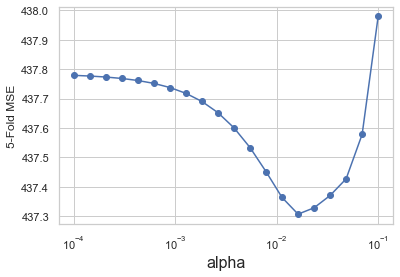

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-4,-1,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [ ]:
#Al hacer la primera iteración nos da un valor negativo

In [147]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 432
MSE Modelo Lasso (test) : 410
RMSE Modelo Lasso (train): 20.8
RMSE Modelo Lasso (test) : 20.2
Host Since 0.4053963457662764
Host Response Time -1.727379848368314
Host Response Rate -0.3865075080727751
Host Listings Count 4.642209896693842
Host Verifications -0.5991246103219338
Neighbourhood 6.438505168600925
Neighbourhood Group Cleansed 0.9459504812174555
Latitude 0.16892521427369564
Longitude 0.4132037450242973
Property Type -0.007435410002192718
Room Type 12.903521561056394
Accommodates 6.890012138134537
Bathrooms 2.183517068099005
Bedrooms 8.621669310346949
Beds -0.21273996424384203
Bed Type 0.43227064116122443
Security Deposit 1.1936462635923553
Cleaning Fee 4.098497431161931
Guests Included 2.727008636434733
Extra People -2.0536148715105322
Minimum Nights -0.5608194405973317
Maximum Nights -0.09093978781354561
Calendar Updated 1.6269026375223092
Availability 30 3.7184729073157516
Availability 60 0.9446249931993084
Availability 90 -1.5991656421831915
A

In [148]:
house_data_filtered['Price'].describe()

count    10291.000000
mean        59.471101
std         35.776676
min          9.000000
25%         30.000000
50%         50.000000
75%         79.000000
max        199.000000
Name: Price, dtype: float64

Resultado:
Sobre los 59€ que tien la media de un alquiler estoy cometiendo un error de 21 € casi del 50%, es un error alto. 
¿Qué podemos hacer? Entre muchas cosas, tal y como vimos en clase, podemos ver la distribucion de la variable price, para qver si podemos normalizarla.

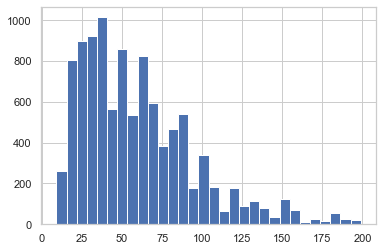

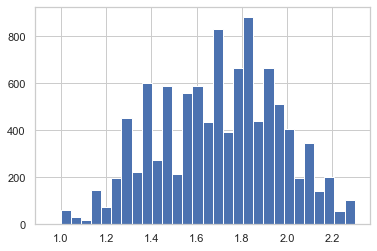

In [151]:
plt.hist(house_data_filtered['Price'], bins=30)
plt.show()

plt.hist(np.log10(house_data_filtered['Price']), bins=30)
plt.show()

Vemos que la variable price esta muy escorada a la izquierda, se parece mas a una normal la distribucion. De esta manera mejoramos prestaciones.

In [152]:
from sklearn import preprocessing
data = house_data_filtered.values
y_train = np.log10(data[:,0:1])     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [153]:
data_test = test_filter.values
y_test = np.log10(data_test[:,0:1])    # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

best mean cross-validation score: -0.019
best parameters: {'alpha': 0.000339322177189533}


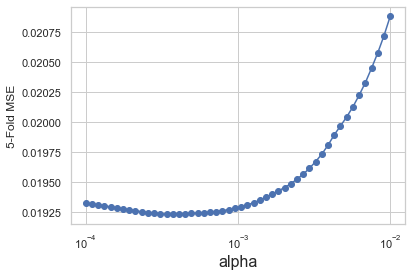

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-4,-2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [157]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 0.019
MSE Modelo Lasso (test) : 0.0192
RMSE Modelo Lasso (train): 0.138
RMSE Modelo Lasso (test) : 0.139
Host Since 0.005284214121217505
Host Response Time -0.01399016446678426
Host Response Rate 0.0
Host Listings Count 0.022753161331647124
Host Verifications -0.004556713428420775
Neighbourhood 0.0497921510225897
Neighbourhood Group Cleansed 0.01622512837081299
Latitude 0.005322002456996189
Longitude 0.0024582676834876077
Property Type -0.00340133387519161
Room Type 0.13421240605474813
Accommodates 0.04895088109847792
Bathrooms 0.007833148226985855
Bedrooms 0.0488029358579546
Beds -0.014535072225982477
Bed Type 0.0031420280549486466
Security Deposit 0.008332193954173136
Cleaning Fee 0.01714734327256927
Guests Included 0.014942186178597775
Extra People -0.010851412552248973
Minimum Nights -0.00420571692614122
Maximum Nights -2.4721831146591214e-05
Calendar Updated 0.008629864708783498
Availability 30 0.025038777495115096
Availability 60 0.0
Availability 90 0.0


Para conocer el error hay que aplicar una antitransformada logaritmica. Pero vemos que hay variables que nos hemos cargado, por ello las borraremos del df y meteremos dichos datos en un RF.

In [160]:
house_data_filtered = house_data_filtered.drop(['Host Response Rate', 'Availability 60', 'Availability 90'], axis=1)
test_filter= test_filter.drop(['Host Response Rate', 'Availability 60', 'Availability 90'], axis=1)

In [161]:
from sklearn import preprocessing
data = house_data_filtered.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [162]:
data_test = test_filter.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

best mean cross-validation score: 0.747
best parameters: {'max_depth': 14}


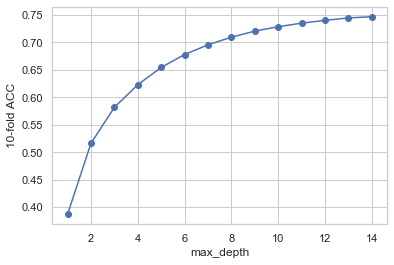

In [163]:
from sklearn.ensemble import RandomForestRegressor

# Tu código aquí
# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [164]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.9155615759262128
Test:  0.7567664916274285


Como vemos, este algoritmo podría estar en overfitting puesto que el valor de train es muy alto y hay mucha diferencia con respecto a los valores de test. Es todo lo contrario a lo que queremos, por ello bajaremos la profundidad a 7 que es donde creo que la gafrica cambia la tendencia.

In [173]:
# Tu código aquí
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo-7,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.7305483639104444
Test:  0.6976783360401811


Ahora vemos que el algoritmo ha bajado en prestaciones pero tambien en complejidad. Y, tanto el resultado de test y training estan mas pegados.

A continuación, medimos la importancia de las variables.

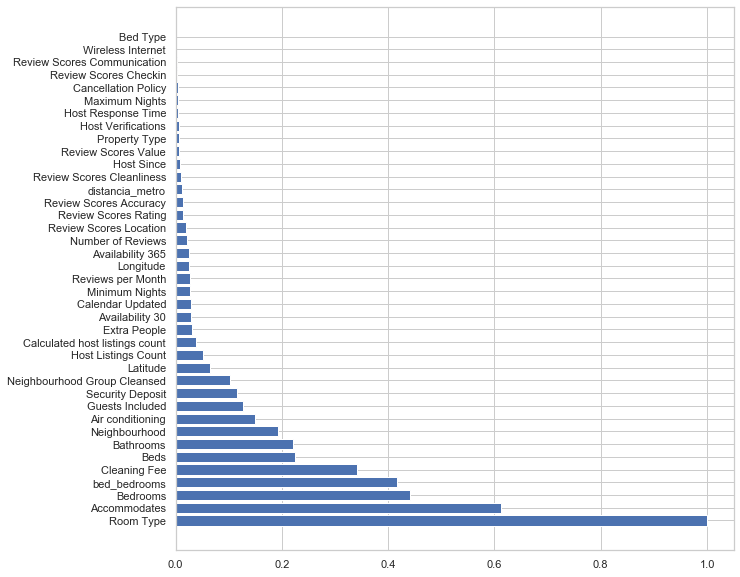

In [175]:
# Tu código aquí
features = house_data_filtered.columns.drop(['Price'])

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

Lo más interesante sería eliminar las variables que no tienen nada de importancia o establecer un umbral en el que consideremos que dicha variable no aporta nada y volver a meterla en el modelo, para ver si de esta manera podemos mejorarlo.

In [176]:
from sklearn import preprocessing
data = house_data_filtered.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [177]:
data_test = test_filter.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Por ahora para ir mas rapido le metemos menos learning rates, nosotros deberiamos ponerle uno mas grandes para probar
Niterations = [1500,2000, 2500]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [ ]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [ ]:
from sklearn import preprocessing
data = house_data_filtered.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price

X_train = data[:,1:]      # nos quedamos con el resto
feature_names = house_data_filtered.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [ ]:
data_test = test_filter.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = test_filter.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=1)
grid.fit(XtrainScaled, y_train)

In [ ]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [ ]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(XtrainScaled,y_train)
print('Acc (TEST): %0.2f'%svmModel.score(XtestScaled,y_test))

Conclusión de la práctica:
Al ser la primera que hago de esta manera, siento que la he organizado un poco mal, ya que he perdido demasiado tiempo en el análisis exploratorio. Lo que me ha dejado apenas 1 dia para testear con los algoritmos.
He realizado un selector de variables, donde pudimos ver que la variable objetivo al estar bastante escorada a la izquierda tenia que ser normalizada con un log en base 10. Una vez hecho, hemos eliminado aquellas variables menos importantes y testeado el df que quedaba con un RF.

No he podido realizar el análisis para Boosted Trees y SVM porque se me hizo tarde y mi ordenador no me permitio testearlo.

En conclusión, he aprendido mucho en este modulo, mñas de lo que probablemente se vea refleajado (me voy muy contento), pero es verdad que me hubieses gustado perder menos tiempo en el análisis exploratorio y poder dedicar algo mas a testear los modelos, pero no lo hice asi porque en clase comentamos que el trabajo más importante era ese.

Un saludo